In [1]:
from datasets import load_dataset

dataset = load_dataset("MathLLMs/MathVision")
print(dataset)

DatasetDict({
    test: Dataset({
        features: ['id', 'question', 'options', 'image', 'decoded_image', 'answer', 'solution', 'level', 'subject'],
        num_rows: 3040
    })
    testmini: Dataset({
        features: ['id', 'question', 'options', 'image', 'decoded_image', 'answer', 'solution', 'level', 'subject'],
        num_rows: 304
    })
})


In [2]:
from datasets import load_dataset

dataset = load_dataset("MathLLMs/MathVision")
print(dataset['test'][:1]['image'])

['images/1.jpg']


In [3]:
sample = dataset["test"][0]
print(sample.keys())
# dict_keys(['id', 'question', 'options', 'image', 'decoded_image', 'answer', 'solution', 'level', 'subject'])

print(sample["id"])
print(sample["question"])
print(sample["options"])
print(sample["image"])
print(sample["decoded_image"])
print(sample["answer"])
print(sample["solution"])
print(sample["level"])
print(sample["subject"])

dict_keys(['id', 'question', 'options', 'image', 'decoded_image', 'answer', 'solution', 'level', 'subject'])
1
Which number should be written in place of the question mark?
<image1>
[]
images/1.jpg
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1176x178 at 0x7FF642B2A550>
60
None
2
arithmetic


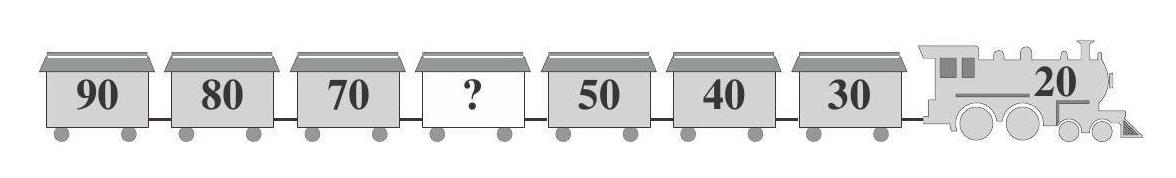

In [4]:
sample = dataset["test"][0]  # 假设你拿了一条样本
img_data = sample["decoded_image"]

from PIL import Image
import base64
from io import BytesIO

if isinstance(img_data, Image.Image):
    # 说明已经是 PIL image
    img = img_data.convert("RGB")
    img.show()
elif isinstance(img_data, str):
    # 可能是 base64 字符串
    img_bytes = base64.b64decode(img_data)
    img = Image.open(BytesIO(img_bytes)).convert("RGB")
    img.show()
else:
    print("unknown format:", type(img_data))


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

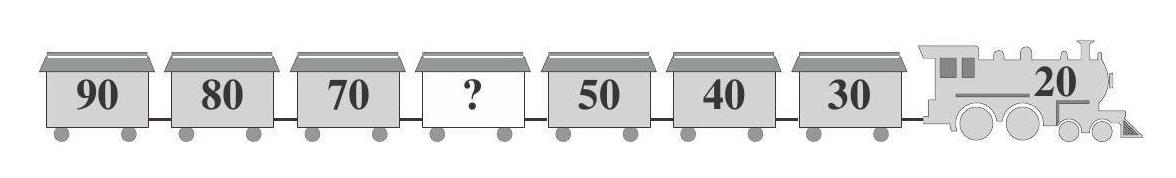

Which number should be written in place of the question mark?
<image1>



In [5]:
from PIL import Image
from transformers import Blip2Processor, Blip2ForConditionalGeneration
import torch
import base64
from io import BytesIO

processor = Blip2Processor.from_pretrained(r"/root/autodl-tmp/model/blip2-opt-2.7b")
model = Blip2ForConditionalGeneration.from_pretrained(r"/root/autodl-tmp/model/blip2-opt-2.7b", device_map="auto")

sample = dataset["test"][0]  # 假设你拿了一条样本
img_data = sample["decoded_image"]

img = img_data.convert("RGB")
img.show()

# 解码图像
# b64_data = sample["decoded_image"]
# img_bytes = base64.b64decode(b64_data)
# img = Image.open(BytesIO(img_bytes)).convert("RGB")

# 构造问答
question = sample["question"]  # 题干
# 亦可组合 question + options

inputs = processor(img, question, return_tensors="pt").to("cuda")
out = model.generate(**inputs, max_new_tokens=100)
print(processor.decode(out[0], skip_special_tokens=True))


In [6]:
num_correct = 0
total = len(dataset["test"])
for i, record in enumerate(dataset["test"]):
    gold_answer = record["answer"]
    # 这里你可以用多模态模型去推理
    # pred_answer = ...
    # if pred_answer == gold_answer:
    #    num_correct += 1

acc = num_correct / total
print(f"Accuracy: {acc:.2%}")


Accuracy: 0.00%


In [7]:
geometry_data = dataset["test"].filter(lambda x: x["subject"] == "几何")


Filter:   0%|          | 0/3040 [00:00<?, ? examples/s]

In [8]:
for record in geometry_data:
    question = record["question"]
    options = record["options"]  # 可能是list/str
    answer  = record["answer"]
    # ...
